## Introduction to Data Science

### Neural Networks Primer

Inspired by [this](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6) post.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

What’s a Neural Network?

Most introductory texts to Neural Networks brings up brain analogies when describing them. Without delving into brain analogies, I find it easier to simply describe Neural Networks as a mathematical function that maps a given input to a desired output.

Neural Networks consist of the following components

    An input layer, x
    An arbitrary amount of hidden layers
    An output layer, ŷ
    A set of weights and biases between each layer, W and b
    A choice of activation function for each hidden layer, σ. In this tutorial, we’ll use a Sigmoid activation function.

The diagram below shows the architecture of a 2-layer Neural Network

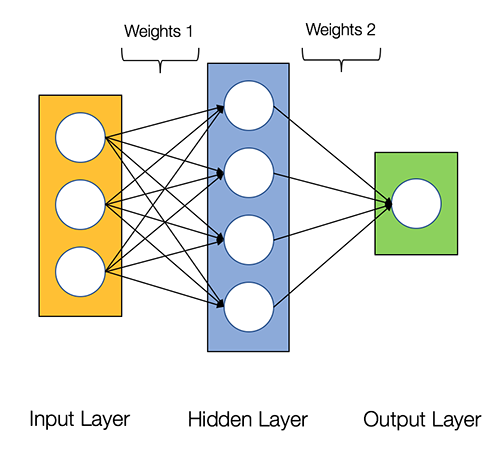

In [2]:
display(Image(os.path.join('../Data/','Figs', 'neuralnet.png'), width=700))

Creating a Neural Network class in Python is easy.

In [3]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

In [4]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    def cal_loss(self):
        self.loss = np.sum(np.square(self.y - self.output))
        return self.loss

Training the Neural Network

The output ŷ of a simple 2-layer Neural Network is:

$ŷ = \sigma (W_{2} \sigma(W_{1}x + b_{1})+b_{2})$

You might notice that in the equation above, the weights W and the biases b are the only variables that affects the output ŷ.

Naturally, the right values for the weights and biases determines the strength of the predictions. The process of fine-tuning the weights and biases from the input data is known as training the Neural Network.

Each iteration of the training process consists of the following steps:

    Calculating the predicted output ŷ, known as feedforward
    Updating the weights and biases, known as backpropagation

The sequential graph below illustrates the process.

In [5]:
display(Image(os.path.join('../datasets/','Figs', 'neuralnet2.png'), width=700))

FileNotFoundError: No such file or directory: '../datasets/Figs/neuralnet2.png'

FileNotFoundError: No such file or directory: '../datasets/Figs/neuralnet2.png'

<IPython.core.display.Image object>

Feedforward

As we’ve seen in the sequential graph above, feedforward is just simple calculus and for a basic 2-layer neural network, the output of the Neural Network is:  

$ŷ = \sigma (W_{2} \sigma(W_{1}x + b_{1})+b_{2})$

We can see the feedforward function in our python code. 
Note that for simplicity, we have assumed the biases to be 0.

However, we still need a way to evaluate the “goodness” of our predictions (i.e. how far off are our predictions)? The Loss Function allows us to do exactly that.
Loss Function

There are many available loss functions, and the nature of our problem should dictate our choice of loss function. In this tutorial, we’ll use a simple sum-of-squares error as our loss function.

$sum-of-squares-error = \sum_{i=1}^{n}(y-ŷ)^2 $

That is, the sum-of-squares error is simply the sum of the difference between each predicted value and the actual value. The difference is squared so that we measure the absolute value of the difference.

Our goal in training is to find the best set of weights and biases that minimizes the loss function.  

Backpropagation

Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

Recall from calculus that the derivative of a function is simply the slope of the function.

In [6]:
display(Image(os.path.join('../datasets/','Figs', 'neuralnet3.png'), width=700))

FileNotFoundError: No such file or directory: '../datasets/Figs/neuralnet3.png'

FileNotFoundError: No such file or directory: '../datasets/Figs/neuralnet3.png'

<IPython.core.display.Image object>

If we have the derivative, we can simply update the weights and biases by increasing/reducing with it(refer to the diagram above). This is known as gradient descent.

However, we can’t directly calculate the derivative of the loss function with respect to the weights and biases because the equation of the loss function does not contain the weights and biases. Therefore, we need the chain rule to help us calculate it.

In [7]:
display(Image(os.path.join('../datasets/','Figs', 'neuralnet4.png'), width=700))

FileNotFoundError: No such file or directory: '../datasets/Figs/neuralnet4.png'

FileNotFoundError: No such file or directory: '../datasets/Figs/neuralnet4.png'

<IPython.core.display.Image object>

It allows us to get what we needed — the derivative (slope) of the loss function with respect to the weights, so that we can adjust the weights accordingly.  

Now that we have that, let’s add the backpropagation function into our python code.

Now that we have our complete python code for doing feedforward and backpropagation, let’s apply our Neural Network on an example and see how well it does.

Our Neural Network should learn the ideal set of weights to represent this function. Note that it isn’t exactly trivial for us to work out the weights just by inspection alone.

Let’s train the Neural Network for 1500 iterations and see what happens.

In [8]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

y = np.array([[0],[1],[1],[0]])
val_loss = []

nn = NeuralNetwork(X,y)

for i in range(1500):
    nn.feedforward()
    nn.backprop()
    val_loss.append(nn.cal_loss())

print(nn.output)

[[0.01998647]
 [0.97436075]
 [0.98463591]
 [0.02250118]]


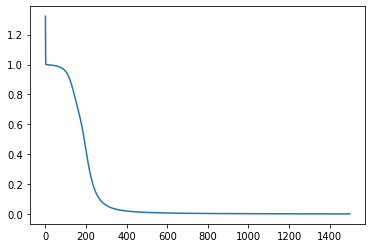

In [9]:
plt.plot(val_loss)

 Looking at the loss per iteration graph below, we can clearly see the loss monotonically decreasing towards a minimum. This is consistent with the gradient descent algorithm that we’ve discussed earlier.